In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('covid.csv')

In [3]:
df.head()

,Age,Country,Gender,Symptoms,Diarrhea,Sputum,Chills,Shortness of Breath,Other Resperatory Symptoms,Malaise,Rhinorrhea,Headache,Pneumonia,mild symptoms,chest pain,sore throat,cough,fever,sneezing,Pneumonitis,LivesInWuhan,TravelHistoryLocation,ChronicDiseaseQ,DeathQ
0,group5(40-49),China,Female,"""cough"", ""fatigue"", ""fever"", ""sputum"", ""myalgias""",0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,NaN,1,1
1,group6(50-59),China,Male,"""cough"", ""sputum"", ""fever""",0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,NaN,0,1
2,group7(60-69),China,Male,"""cough""",0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,NaN,0,1
3,group5(40-49),China,Female,"""chest pain"", ""cough"", ""fever""",0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,NaN,1,0
4,group7(60-69),China,Male,"""chest pain"", ""shortness of breath"", ""fever""",0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,China,0,0


In [4]:
df.columns

Index(['Age', 'Country', 'Gender', 'Symptoms', 'Diarrhea', 'Sputum', 'Chills',
       'Shortness of Breath', 'Other Resperatory Symptoms', 'Malaise',
       'Rhinorrhea', 'Headache', 'Pneumonia', 'mild symptoms', 'chest pain',
       'sore throat', 'cough', 'fever', 'sneezing', 'Pneumonitis',
       'LivesInWuhan', 'TravelHistoryLocation', 'ChronicDiseaseQ', 'DeathQ'],
      dtype='object')

In [0]:
df.drop('Symptoms',axis=1,inplace=True)

In [6]:
df.head()

,Age,Country,Gender,Diarrhea,Sputum,Chills,Shortness of Breath,Other Resperatory Symptoms,Malaise,Rhinorrhea,Headache,Pneumonia,mild symptoms,chest pain,sore throat,cough,fever,sneezing,Pneumonitis,LivesInWuhan,TravelHistoryLocation,ChronicDiseaseQ,DeathQ
0,group5(40-49),China,Female,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,NaN,1,1
1,group6(50-59),China,Male,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,NaN,0,1
2,group7(60-69),China,Male,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,NaN,0,1
3,group5(40-49),China,Female,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,NaN,1,0
4,group7(60-69),China,Male,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,China,0,0


# checking the data distribution 

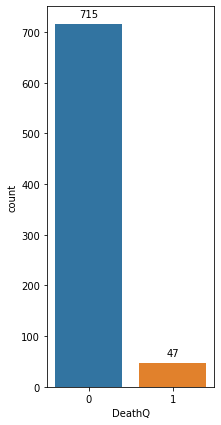

In [7]:
plt.figure(figsize = (3,7))
b = sb.countplot(df['DeathQ'])
#values on top of bars
for p in b.patches:
    b.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., 
    p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize = 10)
plt.show()

In [8]:
print('Proportion of the classes in the data:')
print(df['DeathQ'].value_counts() / len(df))

Proportion of the classes in the data:
0    0.93832
1    0.06168
Name: DeathQ, dtype: float64


# we can see that the data is highly imbalanced, 93% of the data belongs to class 0, which is "not dead" and 6% of the data belongs to the class 1, which is dead. Feeding imbalanced data to your classifier can make it biased in favor of the majority class, simply because it did not have enough data to learn about the minority and hence to overcome this i will be using Smote technique.

In [9]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().any())
print ("\nUnique values :  \n",df.nunique())

Rows     :  762
Columns  :  23

Features : 
 ['Age', 'Country', 'Gender', 'Diarrhea', 'Sputum', 'Chills', 'Shortness of Breath', 'Other Resperatory Symptoms', 'Malaise', 'Rhinorrhea', 'Headache', 'Pneumonia', 'mild symptoms', 'chest pain', 'sore throat', 'cough', 'fever', 'sneezing', 'Pneumonitis', 'LivesInWuhan', 'TravelHistoryLocation', 'ChronicDiseaseQ', 'DeathQ']

Missing values :   Age                            True
Country                       False
Gender                        False
Diarrhea                      False
Sputum                        False
Chills                        False
Shortness of Breath           False
Other Resperatory Symptoms    False
Malaise                       False
Rhinorrhea                    False
Headache                      False
Pneumonia                     False
mild symptoms                 False
chest pain                    False
sore throat                   False
cough                         False
fever                         Fals

# Handeling missing values

In [10]:
import numpy as np
df.isnull().sum()

Age                            23
Country                         0
Gender                          0
Diarrhea                        0
Sputum                          0
Chills                          0
Shortness of Breath             0
Other Resperatory Symptoms      0
Malaise                         0
Rhinorrhea                      0
Headache                        0
Pneumonia                       0
mild symptoms                   0
chest pain                      0
sore throat                     0
cough                           0
fever                           0
sneezing                        0
Pneumonitis                     0
LivesInWuhan                    0
TravelHistoryLocation         143
ChronicDiseaseQ                 0
DeathQ                          0
dtype: int64

In [0]:
#droping age missing records because age is already split intoo bins

df = df[df['Age'].notna()]

**I donot want to drop missing values in columns  TravelHistoryLocation and  because by droping those records i will loose lot of information and hence i will replace all the missing  values in all these columns with "unknown"**

In [0]:

df["TravelHistoryLocation"].fillna("unknown", inplace = True)


In [13]:
df.isnull().sum()

Age                           0
Country                       0
Gender                        0
Diarrhea                      0
Sputum                        0
Chills                        0
Shortness of Breath           0
Other Resperatory Symptoms    0
Malaise                       0
Rhinorrhea                    0
Headache                      0
Pneumonia                     0
mild symptoms                 0
chest pain                    0
sore throat                   0
cough                         0
fever                         0
sneezing                      0
Pneumonitis                   0
LivesInWuhan                  0
TravelHistoryLocation         0
ChronicDiseaseQ               0
DeathQ                        0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 739 entries, 0 to 761
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         739 non-null    object
 1   Country                     739 non-null    object
 2   Gender                      739 non-null    object
 3   Diarrhea                    739 non-null    int64 
 4   Sputum                      739 non-null    int64 
 5   Chills                      739 non-null    int64 
 6   Shortness of Breath         739 non-null    int64 
 7   Other Resperatory Symptoms  739 non-null    int64 
 8   Malaise                     739 non-null    int64 
 9   Rhinorrhea                  739 non-null    int64 
 10  Headache                    739 non-null    int64 
 11  Pneumonia                   739 non-null    int64 
 12  mild symptoms               739 non-null    int64 
 13  chest pain                  739 non-null    int64 

# **Exploratory Data Analysis**

In [0]:
def graph1(var):
    import seaborn as sns
    sns.set(style="darkgrid")
    sns.set_palette("hls", 3)
    fig, ax = plt.subplots(figsize=(20,5))
    ax = sns.countplot(x= var, hue="DeathQ", data=df)

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format(height/df.shape[0]), ha="center")

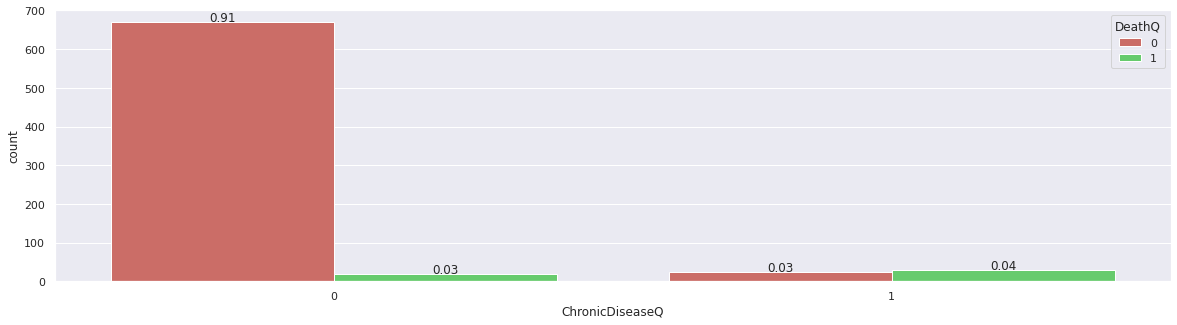

In [16]:
graph1("ChronicDiseaseQ")

#we can see that out of total 6% died, 4% of the population have some chronic diseases while others dont have any

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


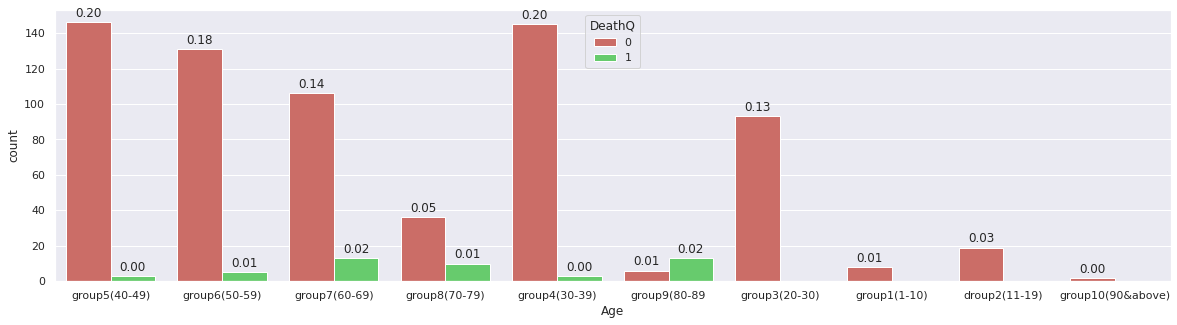

In [17]:
graph1("Age")

# we can notice high death rate among older populations from the above graph,out of 6% total deaths, 5% are among the population with age group 60 and above

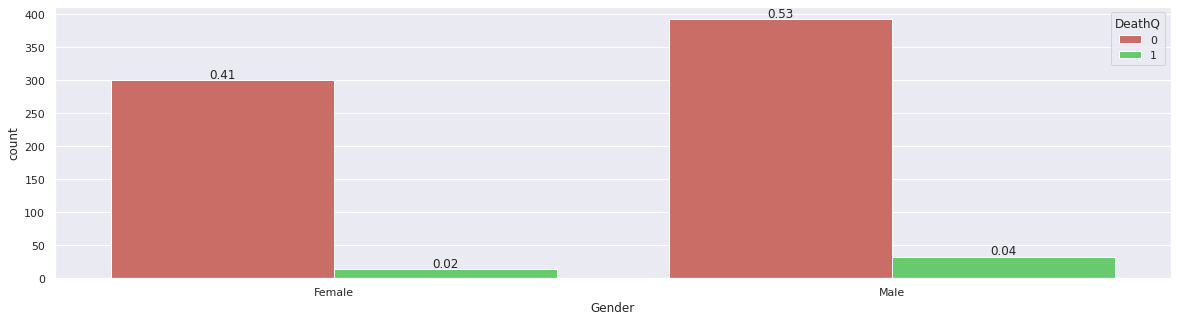

In [18]:
graph1("Gender") 

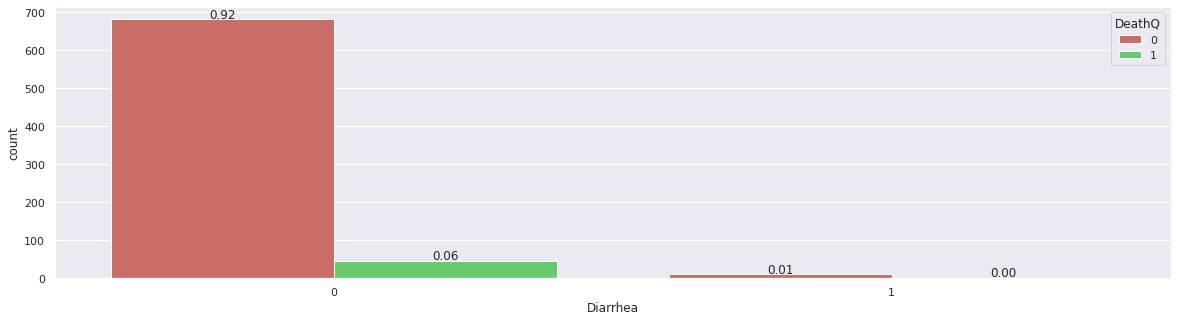

In [19]:
 
 graph1("Diarrhea")

#clearly there are zero deaths from patients reporting "Diarrhea" and hence there is no point in adding this variable to our predictive model hence i would be droping it after confirming my results from Logistic regression.

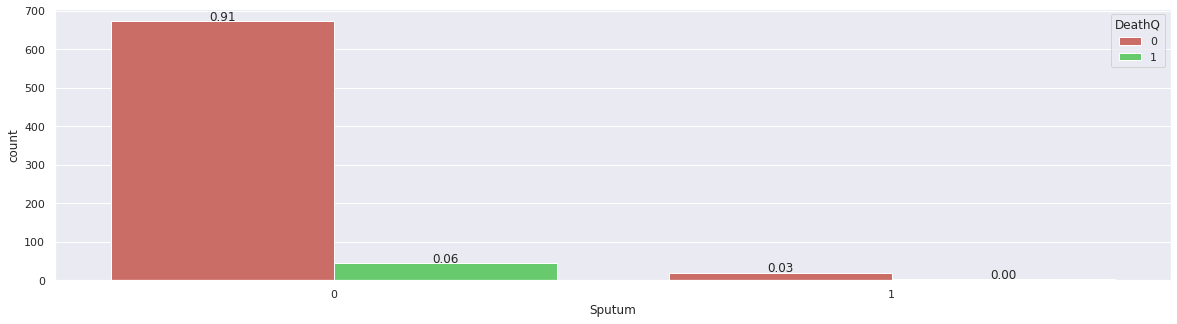

In [20]:
 graph1("Sputum")

#clearly there are zero deaths from patients reporting "sputum" aswell and hence there is no point in adding this variable to our predictive model hence i would be droping it after confirming my results from Logistic regression.

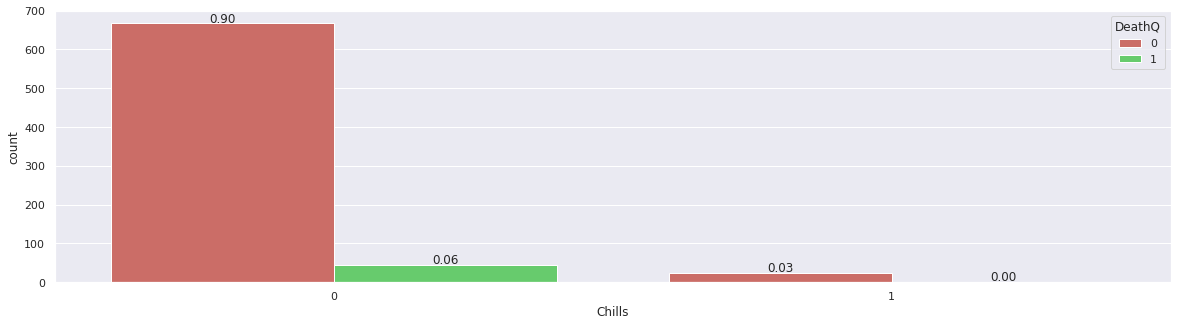

In [21]:
graph1("Chills")

#clearly there are zero deaths from patients reporting "chills" aswell and hence there is no point in adding this variable to our predictive model hence i would be droping it after confirming my results from Logistic regression.

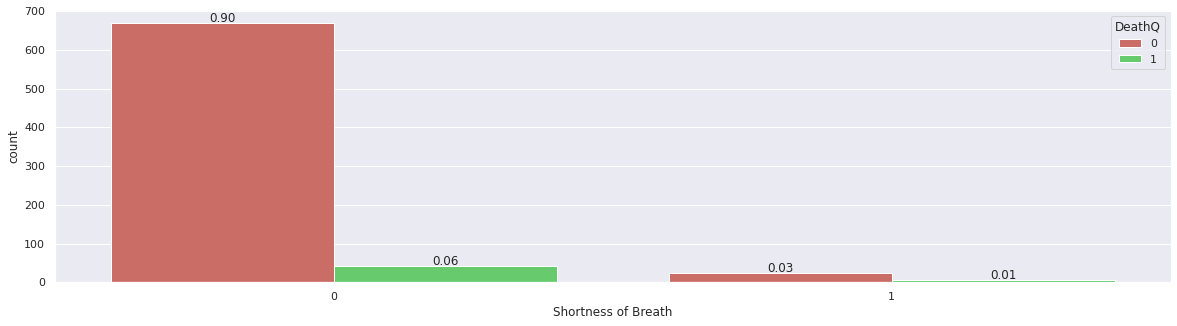

In [22]:
graph1("Shortness of Breath")

# we can see that 1% of sample population who reported shortness of breath have died

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


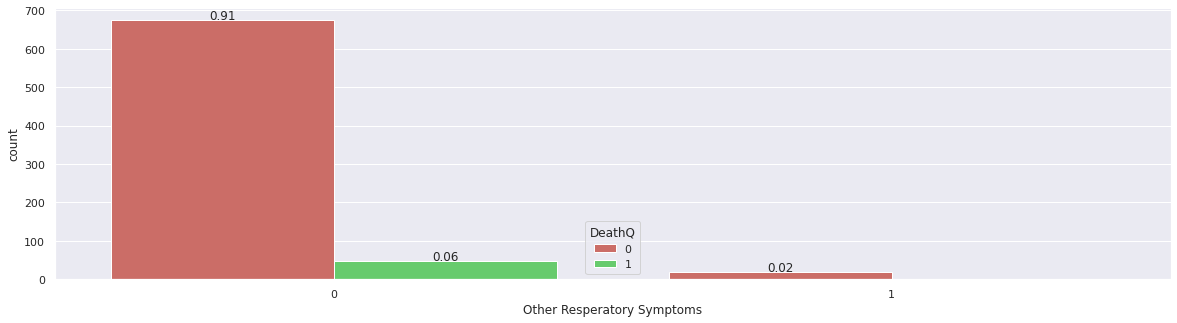

In [23]:
graph1("Other Resperatory Symptoms")

# there are no deaths in the patients who reported other reperatory symptoms and hence this might be a an insignificant predictor

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


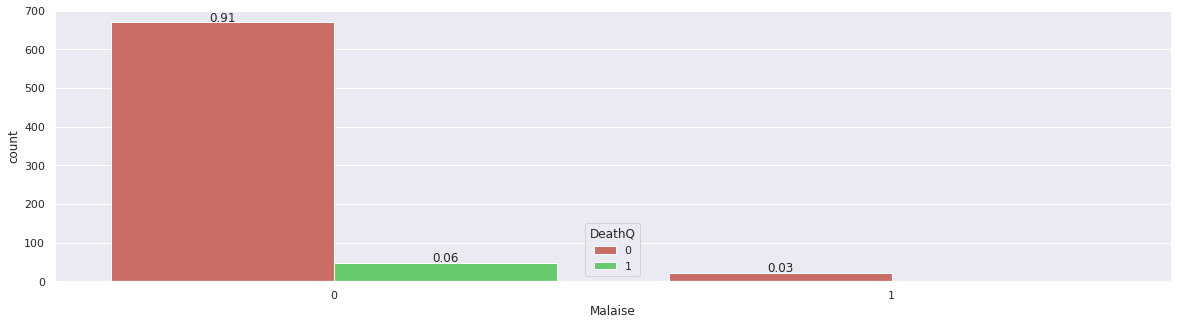

posx and posy should be finite values
posx and posy should be finite values


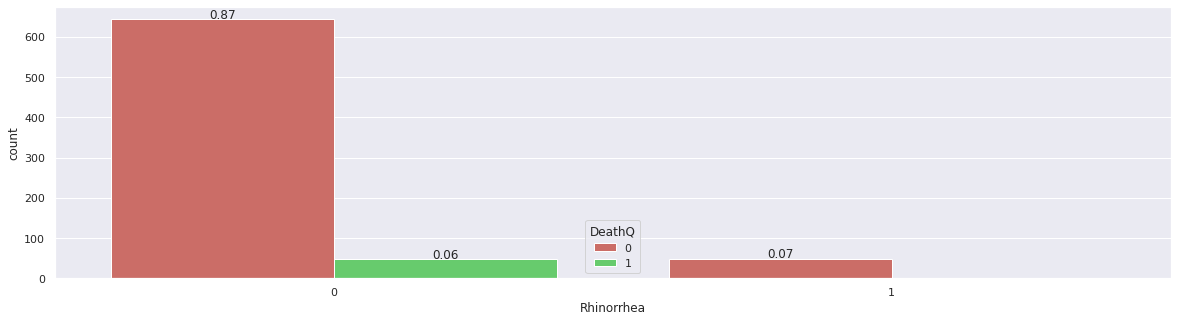

In [24]:
graph1("Malaise")  
graph1('Rhinorrhea')

# even malaise and Rhinorrhea looks like insignificantpredictors as they have zero deaths.

In [25]:
df.columns

Index(['Age', 'Country', 'Gender', 'Diarrhea', 'Sputum', 'Chills',
       'Shortness of Breath', 'Other Resperatory Symptoms', 'Malaise',
       'Rhinorrhea', 'Headache', 'Pneumonia', 'mild symptoms', 'chest pain',
       'sore throat', 'cough', 'fever', 'sneezing', 'Pneumonitis',
       'LivesInWuhan', 'TravelHistoryLocation', 'ChronicDiseaseQ', 'DeathQ'],
      dtype='object')

posx and posy should be finite values


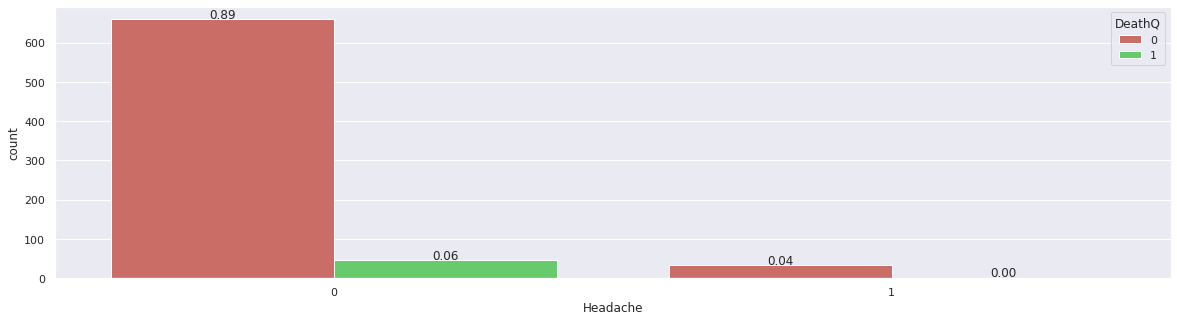

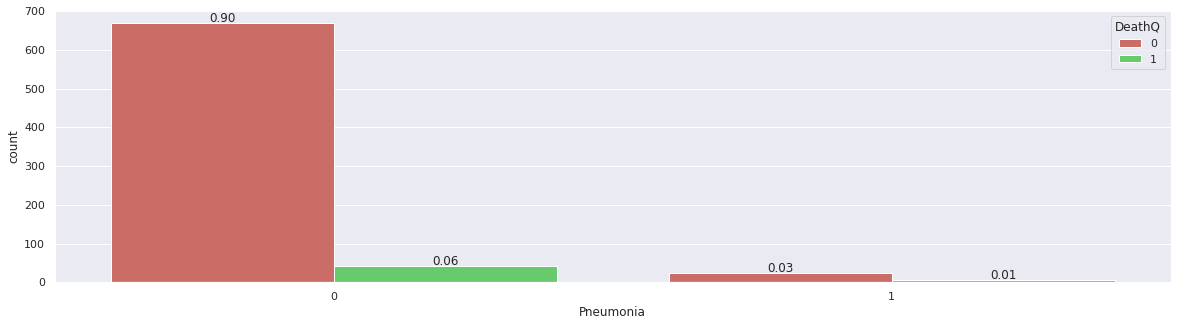

posx and posy should be finite values
posx and posy should be finite values


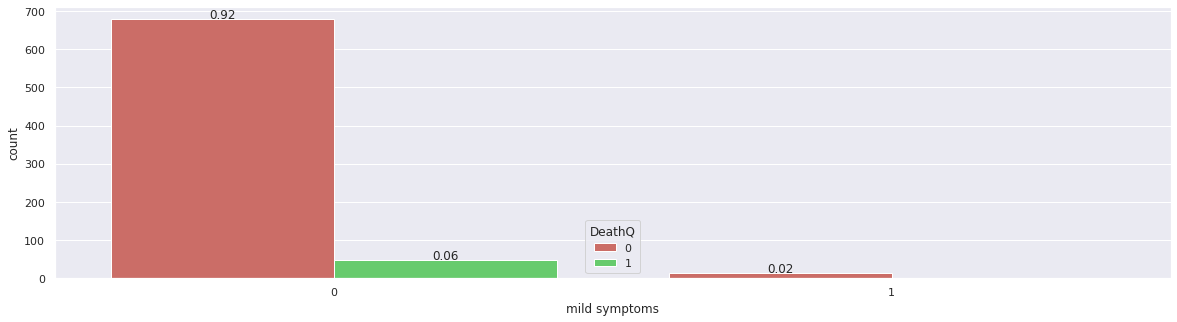

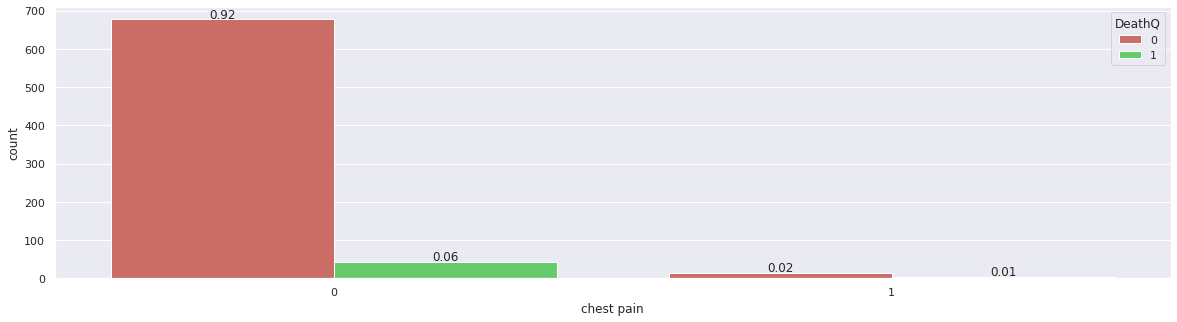

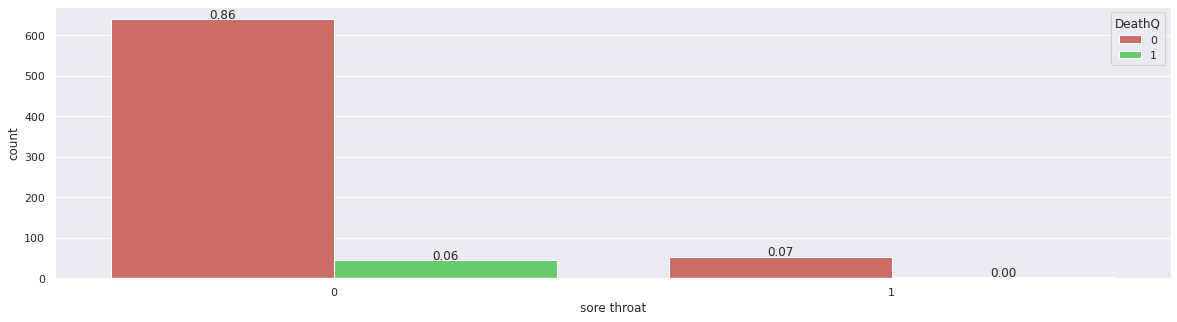

In [26]:
graph1('Headache')
graph1('Pneumonia')
graph1('mild symptoms')
graph1('chest pain')
graph1('sore throat')


#from the above reults only phemonia and chest pain looks like significant predictors.

posx and posy should be finite values
posx and posy should be finite values


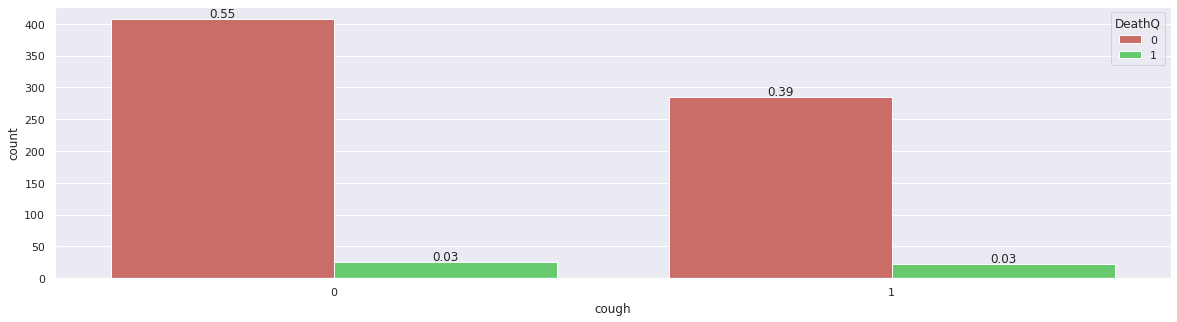

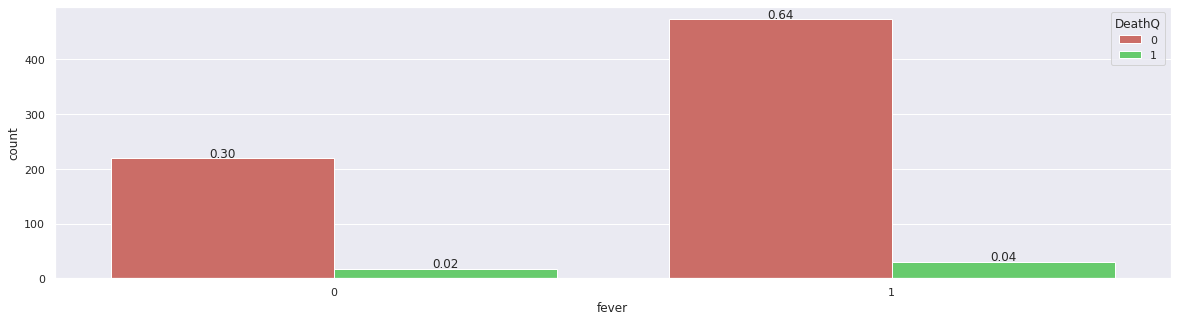

posx and posy should be finite values
posx and posy should be finite values


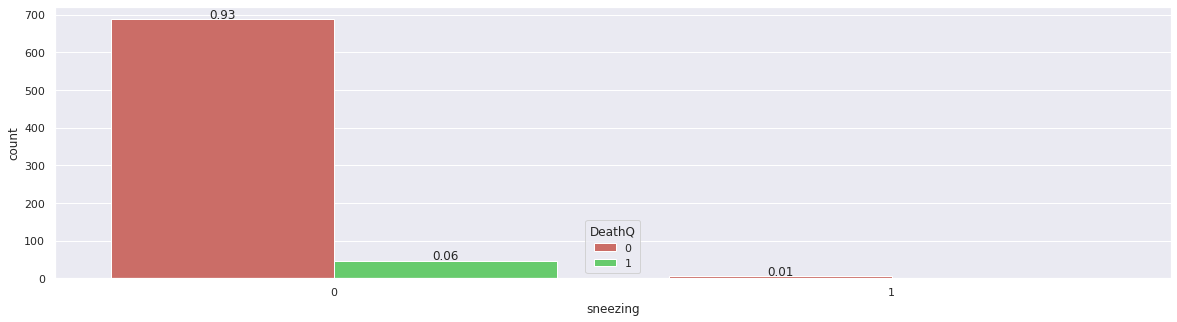

posx and posy should be finite values
posx and posy should be finite values


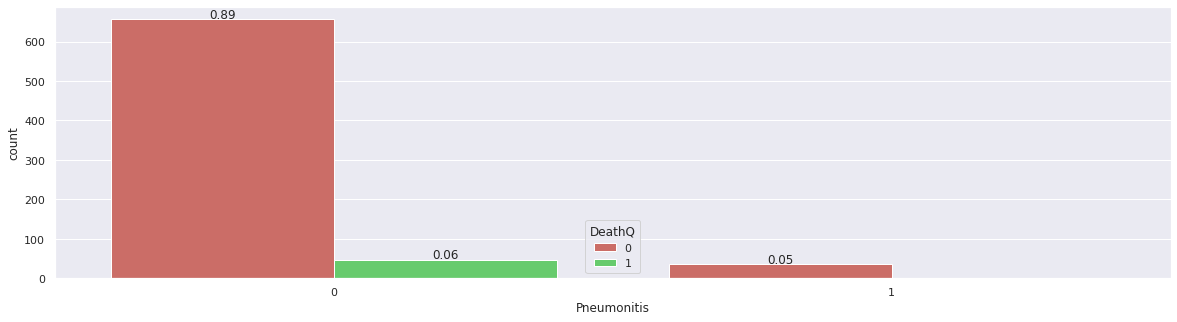

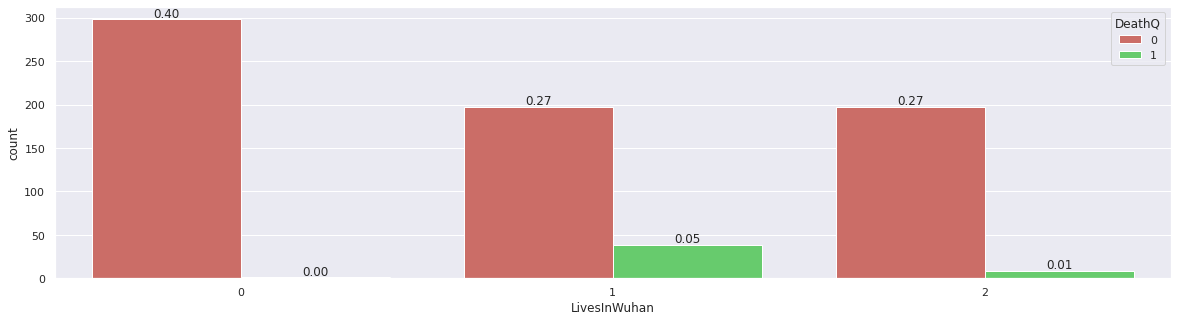

In [27]:
graph1('cough')
graph1('fever')
graph1('sneezing')
graph1('Pneumonitis')
graph1('LivesInWuhan')


# from above grah you can see that sneezing and pneumonitis are not significant

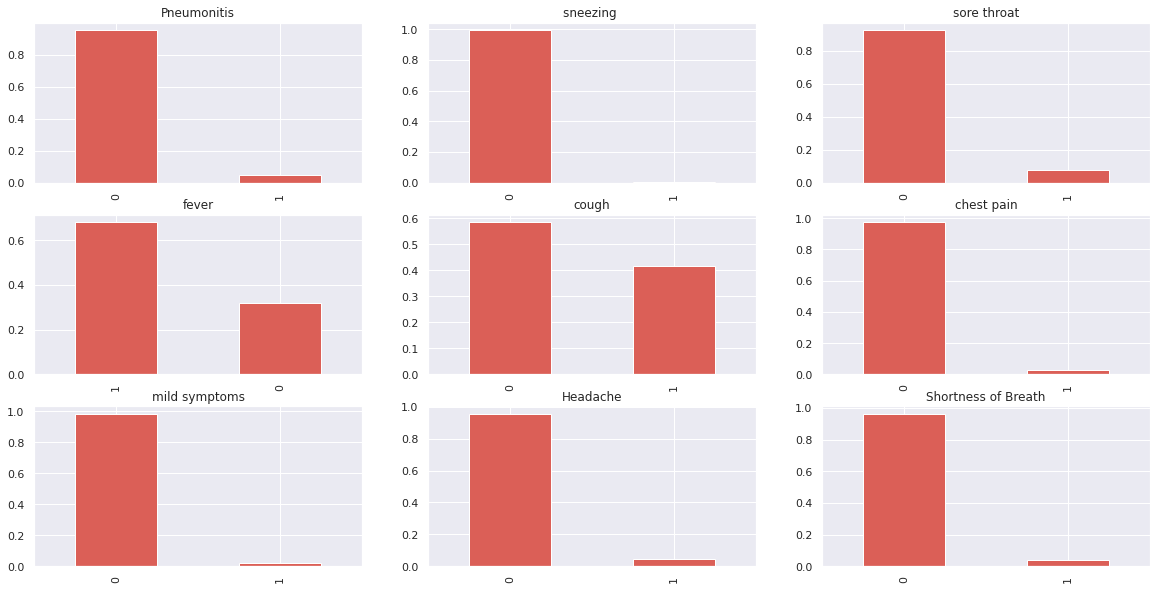

In [28]:
fig = plt.figure(figsize=(14,14))

#  subplot #1
fig.add_subplot(331)
plt.title('Pneumonitis', fontsize=14)
df['Pneumonitis'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Pneumonitis')

#  subplot #2
fig.add_subplot(3,3,2)
df['sneezing'].value_counts(normalize=True).plot.bar(title= 'sneezing ')

#  subplot #3
fig.add_subplot(333)
df['sore throat'].value_counts(normalize=True).plot.bar(title= 'sore throat') 

fig.add_subplot(334)
df['fever'].value_counts(normalize=True).plot.bar(title= 'fever') 

fig.add_subplot(335)
df['cough'].value_counts(normalize=True).plot.bar(title= 'cough') 


fig.add_subplot(336)
df['chest pain'].value_counts(normalize=True).plot.bar(title= 'chest pain') 

fig.add_subplot(337)
df['mild symptoms'].value_counts(normalize=True).plot.bar(title= 'mild symptoms') 


fig.add_subplot(338)
df['Headache'].value_counts(normalize=True).plot.bar(title= 'Headache') 

fig.add_subplot(339)
df['Shortness of Breath'].value_counts(normalize=True).plot.bar(title= 'Shortness of Breath') 



plt.show()

#Feature engineering 

There might be a posiibility that each individual symptom may not cause the death in covid patients but a combination of symptoms may be fetal and hence i will create a new column which is the sum of all the symptons variables.

In [29]:
df.columns

Index(['Age', 'Country', 'Gender', 'Diarrhea', 'Sputum', 'Chills',
       'Shortness of Breath', 'Other Resperatory Symptoms', 'Malaise',
       'Rhinorrhea', 'Headache', 'Pneumonia', 'mild symptoms', 'chest pain',
       'sore throat', 'cough', 'fever', 'sneezing', 'Pneumonitis',
       'LivesInWuhan', 'TravelHistoryLocation', 'ChronicDiseaseQ', 'DeathQ'],
      dtype='object')

In [0]:
df["combined_symptoms"] = df['Diarrhea'] + df ['Sputum'] + df['Chills'] + df['Shortness of Breath'] + df ['Other Resperatory Symptoms'] + df['Malaise'] + df['Rhinorrhea'] + df['Headache'] + df['Pneumonia'] + df['mild symptoms'] + df ['chest pain'] + df[ 'sore throat'] + df['cough'] + df['fever'] +df['sneezing'] + df['Pneumonitis'] + df['ChronicDiseaseQ']

In [31]:
df.head()

,Age,Country,Gender,Diarrhea,Sputum,Chills,Shortness of Breath,Other Resperatory Symptoms,Malaise,Rhinorrhea,Headache,Pneumonia,mild symptoms,chest pain,sore throat,cough,fever,sneezing,Pneumonitis,LivesInWuhan,TravelHistoryLocation,ChronicDiseaseQ,DeathQ,combined_symptoms
0,group5(40-49),China,Female,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,unknown,1,1,4
1,group6(50-59),China,Male,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,unknown,0,1,3
2,group7(60-69),China,Male,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,unknown,0,1,1
3,group5(40-49),China,Female,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,unknown,1,0,4
4,group7(60-69),China,Male,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,China,0,0,3


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 739 entries, 0 to 761
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         739 non-null    object
 1   Country                     739 non-null    object
 2   Gender                      739 non-null    object
 3   Diarrhea                    739 non-null    int64 
 4   Sputum                      739 non-null    int64 
 5   Chills                      739 non-null    int64 
 6   Shortness of Breath         739 non-null    int64 
 7   Other Resperatory Symptoms  739 non-null    int64 
 8   Malaise                     739 non-null    int64 
 9   Rhinorrhea                  739 non-null    int64 
 10  Headache                    739 non-null    int64 
 11  Pneumonia                   739 non-null    int64 
 12  mild symptoms               739 non-null    int64 
 13  chest pain                  739 non-null    int64 

In [33]:
print("unique values of SeniorCitizen  variable are: ",df.Age.unique())

unique values of SeniorCitizen  variable are:  ['group5(40-49)' 'group6(50-59)' 'group7(60-69)' 'group8(70-79)'
 'group4(30-39)' 'group9(80-89' 'group3(20-30)' 'group1(1-10)'
 'droup2(11-19)' 'group10(90&above)']


In [34]:
df.head()

,Age,Country,Gender,Diarrhea,Sputum,Chills,Shortness of Breath,Other Resperatory Symptoms,Malaise,Rhinorrhea,Headache,Pneumonia,mild symptoms,chest pain,sore throat,cough,fever,sneezing,Pneumonitis,LivesInWuhan,TravelHistoryLocation,ChronicDiseaseQ,DeathQ,combined_symptoms
0,group5(40-49),China,Female,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,unknown,1,1,4
1,group6(50-59),China,Male,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,unknown,0,1,3
2,group7(60-69),China,Male,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,unknown,0,1,1
3,group5(40-49),China,Female,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,unknown,1,0,4
4,group7(60-69),China,Male,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,China,0,0,3


In [0]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels  
df['Age']= label_encoder.fit_transform(df['Age']) 
 


In [0]:
df['Country']= label_encoder.fit_transform(df['Country']) 


In [0]:
df['Gender']= label_encoder.fit_transform(df['Gender']) 


In [0]:
df['TravelHistoryLocation']= label_encoder.fit_transform(df['TravelHistoryLocation']) 


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 739 entries, 0 to 761
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Age                         739 non-null    int64
 1   Country                     739 non-null    int64
 2   Gender                      739 non-null    int64
 3   Diarrhea                    739 non-null    int64
 4   Sputum                      739 non-null    int64
 5   Chills                      739 non-null    int64
 6   Shortness of Breath         739 non-null    int64
 7   Other Resperatory Symptoms  739 non-null    int64
 8   Malaise                     739 non-null    int64
 9   Rhinorrhea                  739 non-null    int64
 10  Headache                    739 non-null    int64
 11  Pneumonia                   739 non-null    int64
 12  mild symptoms               739 non-null    int64
 13  chest pain                  739 non-null    int64
 14  sore throa

In [40]:
df.columns

Index(['Age', 'Country', 'Gender', 'Diarrhea', 'Sputum', 'Chills',
       'Shortness of Breath', 'Other Resperatory Symptoms', 'Malaise',
       'Rhinorrhea', 'Headache', 'Pneumonia', 'mild symptoms', 'chest pain',
       'sore throat', 'cough', 'fever', 'sneezing', 'Pneumonitis',
       'LivesInWuhan', 'TravelHistoryLocation', 'ChronicDiseaseQ', 'DeathQ',
       'combined_symptoms'],
      dtype='object')

In [0]:
# # Let's use the statsmodel library 
# import statsmodels.api as sm

# # Define independent variables
# iv = ['Age', 'Country', 'Gender', 'Diarrhea', 'Sputum', 'Chills',
#        'Shortness of Breath', 'Other Resperatory Symptoms', 'Malaise',
#        'Rhinorrhea', 'Headache', 'Pneumonia', 'mild symptoms', 'chest pain',
#        'sore throat', 'cough', 'fever', 'sneezing', 'Pneumonitis',
#        'LivesInWuhan', 'TravelHistoryLocation', 'ChronicDiseaseQ']

# # Fit the logistic regression function
# logReg = sm.Logit(df.DeathQ,df[iv])
# answer = logReg.fit()

In [0]:
# # Display the parameter coefficients 
# np.exp(answer.params)

In [0]:
# print(answer.summary())

according to over model our Pseudo R-squ.0.3485 and significant features at 95% confidence are country, fever, travel history location and chronic disease are significant. now lets try to built another model with these few features and see our results.

In [44]:
df.columns

Index(['Age', 'Country', 'Gender', 'Diarrhea', 'Sputum', 'Chills',
       'Shortness of Breath', 'Other Resperatory Symptoms', 'Malaise',
       'Rhinorrhea', 'Headache', 'Pneumonia', 'mild symptoms', 'chest pain',
       'sore throat', 'cough', 'fever', 'sneezing', 'Pneumonitis',
       'LivesInWuhan', 'TravelHistoryLocation', 'ChronicDiseaseQ', 'DeathQ',
       'combined_symptoms'],
      dtype='object')

In [113]:
import statsmodels.api as sm

# Define independent variables
iv_2 = ['Age', 'Country', 'Gender', 'Diarrhea', 'Sputum', 'Chills',
       'Shortness of Breath', 'Other Resperatory Symptoms', 'Malaise',
       'Rhinorrhea', 'Headache', 'Pneumonia', 'mild symptoms', 'chest pain',
       'sore throat', 'cough', 'fever', 'sneezing', 'Pneumonitis',
       'LivesInWuhan', 'TravelHistoryLocation', 'ChronicDiseaseQ',
       'combined_symptoms']

# Fit the logistic regression function
logReg_2 = sm.Logit(df.DeathQ,df[iv_2])
answer_2 = logReg_2.fit()

         Current function value: 0.154239
         Iterations: 35


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [46]:
print(answer_2.summary())

                           Logit Regression Results                           
Dep. Variable:                 DeathQ   No. Observations:                  739
Model:                          Logit   Df Residuals:                      719
Method:                           MLE   Df Model:                           19
Date:                Sat, 09 May 2020   Pseudo R-squ.:                  0.3443
Time:                        01:21:27   Log-Likelihood:                -114.72
converged:                      False   LL-Null:                       -174.96
Covariance Type:            nonrobust   LLR p-value:                 8.997e-17
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Age                      -0.0961      0.084     -1.141      0.254      -0.261       0.069
Sputum                    2.7236      1.264      2.154      0.031       0.246       5.202
Diarrhea

In [0]:
df_1 = df

In [116]:
df_1.head()

,Age,Country,Gender,Diarrhea,Sputum,Chills,Shortness of Breath,Other Resperatory Symptoms,Malaise,Rhinorrhea,Headache,Pneumonia,mild symptoms,chest pain,sore throat,cough,fever,sneezing,Pneumonitis,LivesInWuhan,TravelHistoryLocation,ChronicDiseaseQ,DeathQ,combined_symptoms
0,5,11,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,30,1,1,4
1,6,11,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,30,0,1,3
2,7,11,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,30,0,1,1
3,5,11,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,30,1,0,4
4,7,11,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,3


In [0]:
X = df_1.drop(['DeathQ'],axis = 1)
y = df_1['DeathQ']

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=df_1['DeathQ'],test_size=0.3, random_state=10)
X_test.shape

(222, 23)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [0]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# SMOTE


In [121]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 33
Before OverSampling, counts of label '0': 484 

After OverSampling, the shape of train_X: (968, 23)
After OverSampling, the shape of train_y: (968,) 

After OverSampling, counts of label '1': 484
After OverSampling, counts of label '0': 484


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [122]:
# Let's use the statsmodel library 
import statsmodels.api as sm

# Fit the logistic regression function
logReg_4 = sm.Logit(y_train_res,X_train_res)
answer_4 = logReg_4.fit()

         Current function value: 0.403084
         Iterations: 35


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [123]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 739 entries, 0 to 761
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Age                         739 non-null    int64
 1   Country                     739 non-null    int64
 2   Gender                      739 non-null    int64
 3   Diarrhea                    739 non-null    int64
 4   Sputum                      739 non-null    int64
 5   Chills                      739 non-null    int64
 6   Shortness of Breath         739 non-null    int64
 7   Other Resperatory Symptoms  739 non-null    int64
 8   Malaise                     739 non-null    int64
 9   Rhinorrhea                  739 non-null    int64
 10  Headache                    739 non-null    int64
 11  Pneumonia                   739 non-null    int64
 12  mild symptoms               739 non-null    int64
 13  chest pain                  739 non-null    int64
 14  sore throa

In [124]:
print(answer_4.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  968
Model:                          Logit   Df Residuals:                      946
Method:                           MLE   Df Model:                           21
Date:                Sat, 09 May 2020   Pseudo R-squ.:                  0.4185
Time:                        01:59:18   Log-Likelihood:                -390.19
converged:                      False   LL-Null:                       -670.97
Covariance Type:            nonrobust   LLR p-value:                1.899e-105
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4537      0.100      4.519      0.000       0.257       0.650
x2            -0.2591      0.109     -2.387      0.017      -0.472      -0.046
x3             0.3177      0.094      3.370      0.0

# *we can see from the above results and conclude from the p value that most significant independent variables in our model are Age, Gender,LivesInWuhan,Country,fever,cough,TravelHistoryLocation,ChronicDiseaseQ,Pneumonia,combined_symptoms.*




# **Choosing Evaluation Metric**

In this case my priority would be minimizing false negatives because if a model gives a wrong prediction that a patient would nor die then he may not be given required attention by the staff and may die. at the same time for us minimising false positives is also important because if the person in the stable condient who does not require extra atention is send to intensive care unit, then there may be shortage of beds in the hospital and some patient who is in real need of intensive care may not get it . hence we need a balance between and recall and hence i would choose F1 score which is hormonic mean of precision and recall as as my evaluation metric.

# Model

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
#from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
#from yellowbrick.classifier import DiscriminationThreshold

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [59]:
from xgboost import XGBClassifier
import pandas as pd
classifiers = [['DecisionTree :',DecisionTreeClassifier()],
               ['Naive Bayes :', GaussianNB()],
               ['KNeighbours :', KNeighborsClassifier()],
               ['LogisticRegression :', LogisticRegression()],
               ['XgBoostClassifier :', XGBClassifier()],
               ['Random Forest :', RandomForestClassifier()]]




recall_df = pd.DataFrame(columns=['name','recall score'])
f1_df = pd.DataFrame(columns=['name','f1 score'])

for name,classifier in classifiers:
    clf = classifier
    #y_train_res,X_train_res
    clf.fit(X_train_res, y_train_res)
    predictions = clf.predict(X_test)
    recall_s = recall_score(y_test, predictions)
    f1_s = f1_score(y_test, predictions)
    print(name, recall_s)
    recall_df = recall_df.append({'name':name,'recall score':recall_s},ignore_index=True)
    f1_df = f1_df.append({'name':name,'f1 score':f1_s},ignore_index=True)

DecisionTree : 0.7142857142857143
Naive Bayes : 1.0
KNeighbours : 0.7857142857142857
LogisticRegression : 0.7857142857142857
XgBoostClassifier : 0.7857142857142857
Random Forest : 0.7142857142857143


In [61]:
f1_df

,name,f1 score
0,DecisionTree :,0.769231
1,Naive Bayes :,0.137255
2,KNeighbours :,0.511628
3,LogisticRegression :,0.488889
4,XgBoostClassifier :,0.758621
5,Random Forest :,0.769231


In [63]:
recall_df

,name,recall score
0,DecisionTree :,0.714286
1,Naive Bayes :,1.000000
2,KNeighbours :,0.785714
3,LogisticRegression :,0.785714
4,XgBoostClassifier :,0.785714
5,Random Forest :,0.714286


creating data with significant features

In [64]:
df.head()

,Age,Country,Gender,Diarrhea,Sputum,Chills,Shortness of Breath,Other Resperatory Symptoms,Malaise,Rhinorrhea,Headache,Pneumonia,mild symptoms,chest pain,sore throat,cough,fever,sneezing,Pneumonitis,LivesInWuhan,TravelHistoryLocation,ChronicDiseaseQ,DeathQ,combined_symptoms
0,5,11,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,30,1,1,4
1,6,11,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,30,0,1,3
2,7,11,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,30,0,1,1
3,5,11,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,30,1,0,4
4,7,11,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,3


In [0]:
#Age, Gender,LivesInWuhan,Country,fever,cough,TravelHistoryLocation,ChronicDiseaseQ,Pneumonia,combined_symptoms.

In [0]:
iv_4 = ['Age','Gender','LivesInWuhan','Country','fever','cough','TravelHistoryLocation', 'ChronicDiseaseQ','Pneumonia','combined_symptoms','DeathQ' ]

In [0]:
df_2 = df[iv_4]

In [67]:
df_2.head()

,Age,Gender,LivesInWuhan,Country,fever,cough,TravelHistoryLocation,ChronicDiseaseQ,Pneumonia,combined_symptoms,DeathQ
0,5,0,1,11,1,1,30,1,0,4,1
1,6,1,1,11,1,1,30,0,0,3,1
2,7,1,1,11,0,1,30,0,0,1,1
3,5,0,1,11,1,1,30,1,0,4,0
4,7,1,1,11,1,0,1,0,0,3,0


In [0]:
X2 = df_2.drop(['DeathQ'],axis = 1)
y2 = df_2['DeathQ']

In [69]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, stratify=df_2['DeathQ'],test_size=0.3, random_state=10)
X_test2.shape

(222, 10)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [0]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train2 == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train2 == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res2, y_train_res2 = sm.fit_sample(X_train2, y_train2.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res2.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res2.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res2 == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res2 == 0)))

Before OverSampling, counts of label '1': 33
Before OverSampling, counts of label '0': 484 

After OverSampling, the shape of train_X: (968, 10)
After OverSampling, the shape of train_y: (968,) 

After OverSampling, counts of label '1': 484
After OverSampling, counts of label '0': 484


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [73]:
import statsmodels.api as sm

# Fit the logistic regression function
logReg_5 = sm.Logit(y_train_res2,X_train_res2)
answer_5 = logReg_5.fit()

Optimization terminated successfully.
         Current function value: 0.451544
         Iterations 7


In [74]:
print(answer_5.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  968
Model:                          Logit   Df Residuals:                      958
Method:                           MLE   Df Model:                            9
Date:                Sat, 09 May 2020   Pseudo R-squ.:                  0.3486
Time:                        01:34:40   Log-Likelihood:                -437.09
converged:                       True   LL-Null:                       -670.97
Covariance Type:            nonrobust   LLR p-value:                 4.604e-95
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0712      0.044      1.604      0.109      -0.016       0.158
x2             0.5097      0.178      2.864      0.004       0.161       0.858
x3             0.2029      0.133      1.525      0.1

In [0]:
#iv_2 = ['Age','Gender',,'LivesInWuhan','Country','fever','cough','TravelHistoryLocation', 'ChronicDiseaseQ',,'combined_symptoms']

In [0]:
iv_5 = ['Age','Gender','LivesInWuhan','Country','fever','cough','TravelHistoryLocation', 'ChronicDiseaseQ','Pneumonia','combined_symptoms','Chills','Shortness of Breath','chest pain', 'Headache','mild symptoms','DeathQ' ]

In [0]:
df_3 = df[iv_5]

In [283]:
df_3.head()

,Age,Gender,LivesInWuhan,Country,fever,cough,TravelHistoryLocation,ChronicDiseaseQ,Pneumonia,combined_symptoms,Chills,Shortness of Breath,chest pain,Headache,mild symptoms,DeathQ
0,5,0,1,11,1,1,30,1,0,4,0,0,0,0,0,1
1,6,1,1,11,1,1,30,0,0,3,0,0,0,0,0,1
2,7,1,1,11,0,1,30,0,0,1,0,0,0,0,0,1
3,5,0,1,11,1,1,30,1,0,4,0,0,1,0,0,0
4,7,1,1,11,1,0,1,0,0,3,0,1,1,0,0,0


In [0]:
X3 = df_3.drop(['DeathQ'],axis = 1)
y3 = df_3['DeathQ']

In [285]:
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, stratify=df_3['DeathQ'],test_size=0.3, random_state=10)
X_test3.shape

(222, 15)

In [292]:
X_test3

,Age,Gender,LivesInWuhan,Country,fever,cough,TravelHistoryLocation,ChronicDiseaseQ,Pneumonia,combined_symptoms,Chills,Shortness of Breath,chest pain,Headache,mild symptoms
81,4,0,1,18,1,1,1,0,0,2,0,0,0,0,0
359,4,1,0,31,0,1,1,1,0,2,0,0,0,0,0
565,5,1,0,27,0,0,24,0,0,0,0,0,0,0,0
752,0,1,2,22,0,0,29,0,0,0,0,0,0,0,0
294,8,1,0,11,0,0,6,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,6,1,0,7,1,0,3,0,0,3,0,0,0,1,0
605,4,0,2,11,0,1,18,0,0,1,0,0,0,0,0
257,5,0,1,11,1,1,1,0,0,2,0,0,0,0,0
434,7,1,0,11,0,0,30,0,0,0,0,0,0,0,0


In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [0]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [289]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train3 == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train3 == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res3, y_train_res3 = sm.fit_sample(X_train3, y_train3.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res3.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res3.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res3 == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res3 == 0)))

Before OverSampling, counts of label '1': 33
Before OverSampling, counts of label '0': 484 

After OverSampling, the shape of train_X: (968, 15)
After OverSampling, the shape of train_y: (968,) 

After OverSampling, counts of label '1': 484
After OverSampling, counts of label '0': 484


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [293]:
X_test_res3, y_test_res3 = sm.fit_sample(X_test3, y_test3.ravel()) 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [276]:
import statsmodels.api as sm

# Fit the logistic regression function
logReg_6 = sm.Logit(y_train_res3,X_train_res3)
answer_6 = logReg_6.fit()

Optimization terminated successfully.
         Current function value: 0.403627
         Iterations 20


In [277]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 739 entries, 0 to 761
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Age                    739 non-null    int64
 1   Gender                 739 non-null    int64
 2   LivesInWuhan           739 non-null    int64
 3   Country                739 non-null    int64
 4   fever                  739 non-null    int64
 5   cough                  739 non-null    int64
 6   TravelHistoryLocation  739 non-null    int64
 7   ChronicDiseaseQ        739 non-null    int64
 8   Pneumonia              739 non-null    int64
 9   combined_symptoms      739 non-null    int64
 10  Chills                 739 non-null    int64
 11  Shortness of Breath    739 non-null    int64
 12  chest pain             739 non-null    int64
 13  Headache               739 non-null    int64
 14  mild symptoms          739 non-null    int64
 15  DeathQ                 739 non-null    i

In [278]:
print(answer_6.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  968
Model:                          Logit   Df Residuals:                      953
Method:                           MLE   Df Model:                           14
Date:                Sat, 09 May 2020   Pseudo R-squ.:                  0.4177
Time:                        02:22:27   Log-Likelihood:                -390.71
converged:                       True   LL-Null:                       -670.97
Covariance Type:            nonrobust   LLR p-value:                1.330e-110
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0394      0.049      0.808      0.419      -0.056       0.135
x2             0.4856      0.193      2.518      0.012       0.108       0.864
x3             0.3563      0.149      2.396      0.0

**From above results my most significant features are Gender, LivesInWuhan, country, fever,TravelHistoryLocation,chronicDiseaseQ, combines symptoms, chills, shortness of breadth, chest pain and headache**




In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
#from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
#from yellowbrick.classifier import DiscriminationThreshold

In [296]:
from xgboost import XGBClassifier
import pandas as pd
classifiers = [['DecisionTree :',DecisionTreeClassifier()],
               ['Naive Bayes :', GaussianNB()],
               ['KNeighbours :', KNeighborsClassifier()],
               ['LogisticRegression :', LogisticRegression()],
               ['XgBoostClassifier :', XGBClassifier()],
               ['Random Forest :', RandomForestClassifier()]]




recall_df = pd.DataFrame(columns=['name','recall score'])
f1_df = pd.DataFrame(columns=['name','f1 score'])

for name,classifier in classifiers:
    clf = classifier
    #y_train_res,X_train_res
    clf.fit(X_train_res3, y_train_res3)
    predictions = clf.predict(X_test_res3)
    recall_s = recall_score(y_test_res3, predictions)
    f1_s = f1_score(y_test_res3, predictions)
    print(name, recall_s)
    recall_df = recall_df.append({'name':name,'recall score':recall_s},ignore_index=True)
    f1_df = f1_df.append({'name':name,'f1 score':f1_s},ignore_index=True)

DecisionTree : 0.8509615384615384
Naive Bayes : 0.8125
KNeighbours : 0.8365384615384616
LogisticRegression : 0.8076923076923077
XgBoostClassifier : 0.7740384615384616


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Random Forest : 0.7596153846153846


In [297]:
f1_df

,name,f1 score
0,DecisionTree :,0.905371
1,Naive Bayes :,0.717622
2,KNeighbours :,0.881013
3,LogisticRegression :,0.825553
4,XgBoostClassifier :,0.865591
5,Random Forest :,0.856369


In [327]:
recall_df 

,name,recall score
0,DecisionTree :,0.850962
1,Naive Bayes :,0.812500
2,KNeighbours :,0.836538
3,LogisticRegression :,0.807692
4,XgBoostClassifier :,0.774038
5,Random Forest :,0.759615


# **Hyperparameter Tuning**

In [0]:
dt = DecisionTreeClassifier()

In [300]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [319]:
kf = StratifiedKFold(n_splits=3)
param_grid_dt = {'criterion': ['gini', 'entropy'],
              'max_depth': [5,8,10,15,20,25,30],
              'max_leaf_nodes': [7,8,9,10,12,15,20]}
grid_dt = GridSearchCV(dt, param_grid_dt, cv= 3, scoring='recall')
grid_dt.fit(X_train_res3, y_train_res3)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [320]:
grid_dt.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
dt_tuned = grid_dt.best_estimator_

In [322]:
dt_tuned.fit(X_train_res3,y_train_res3)
dt_pred = dt_tuned.predict(X_test_res3)
print(classification_report(y_test_res3, dt_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       208
           1       0.97      0.85      0.91       208

    accuracy                           0.91       416
   macro avg       0.92      0.91      0.91       416
weighted avg       0.92      0.91      0.91       416



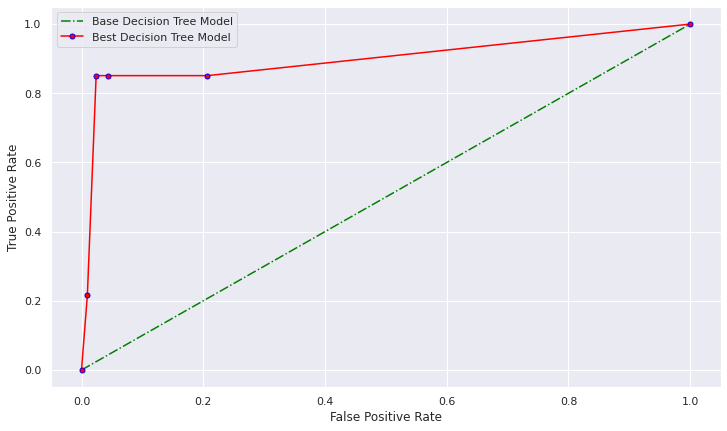

In [323]:
plt.figure(figsize=(12,7))
base_probs = [0 for _ in range(len(y_test_res3))]

best_probs = dt_tuned.predict_proba(X_test_res3)
best_probs = best_probs[:, 1]

base_fpr, base_tpr, _ = roc_curve(y_test_res3, base_probs)
best_fpr, best_tpr, _ = roc_curve(y_test_res3, best_probs)

plt.plot(base_fpr, base_tpr, linestyle='dashdot', label='Base Decision Tree Model',color='Green')
plt.plot(best_fpr, best_tpr, marker='.', label='Best Decision Tree Model',color='Red',markeredgecolor='Blue',markersize=10)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

In [324]:
base_probs = [0 for _ in range(len(y_test_res3))]

best_probs = dt_tuned.predict_proba(X_test_res3)
best_probs = best_probs[:, 1]

base_auc = roc_auc_score(y_test_res3, base_probs)
best_auc = roc_auc_score(y_test_res3, best_probs)

print('Base Decision Tree Model: Auc = %.3f' % (base_auc))
print('Best Decision Tree Model: Auc = %.3f' % (best_auc))

Base Decision Tree Model: Auc = 0.500
Best Decision Tree Model: Auc = 0.898


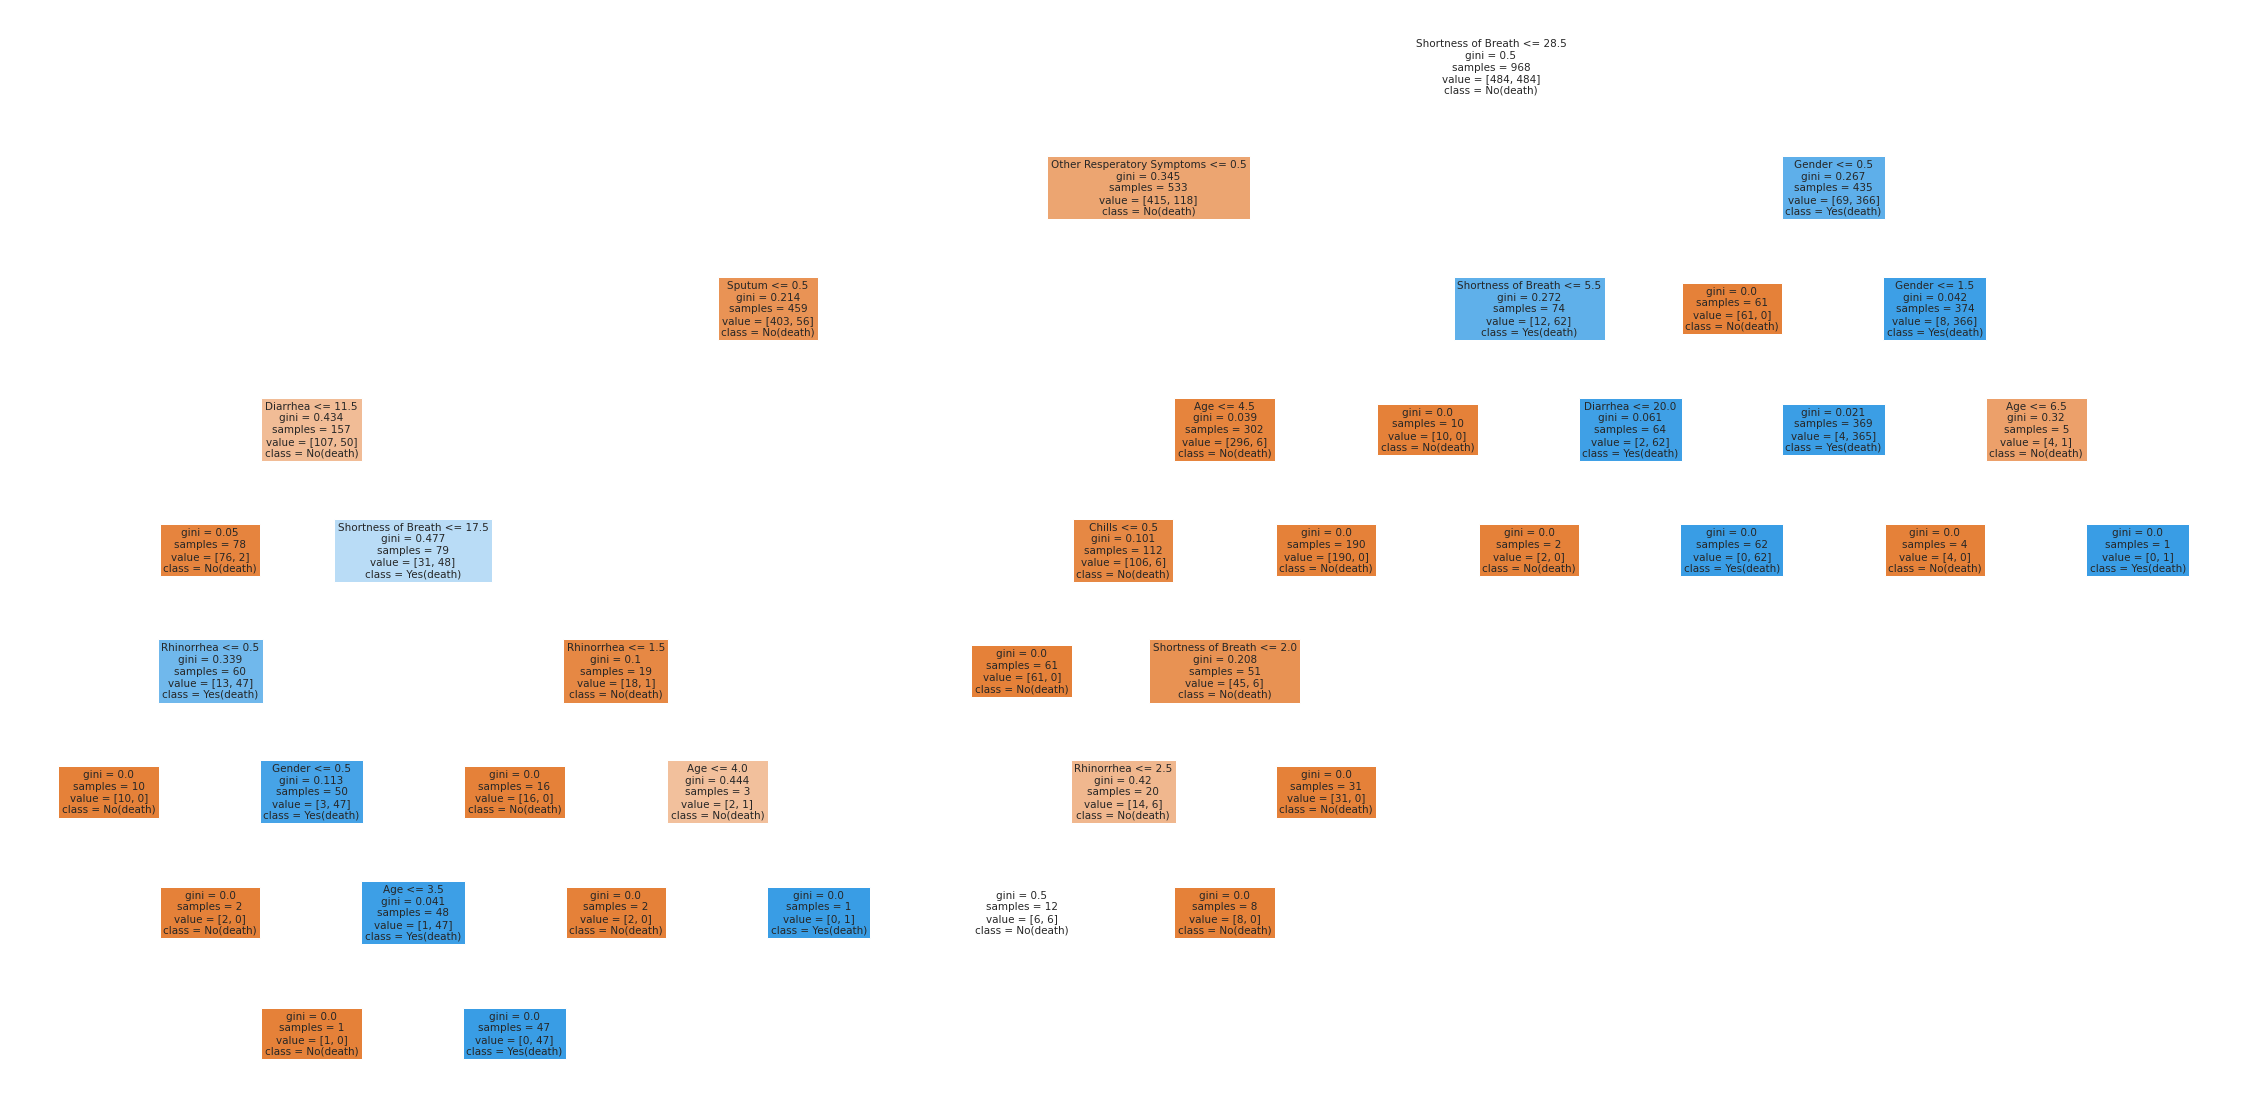

In [325]:
from sklearn.tree import plot_tree
plt.figure(figsize=(40,20))
plot_tree(dt_tuned,filled=True,feature_names=X.columns,class_names=['No(death)','Yes(death)'])
plt.show()

Age                      0.011360
Gender                   0.000000
LivesInWuhan             0.236554
Country                  0.065337
fever                    0.039514
cough                    0.001649
TravelHistoryLocation    0.467553
ChronicDiseaseQ          0.140091
Pneumonia                0.000000
combined_symptoms        0.037942
Chills                   0.000000
Shortness of Breath      0.000000
chest pain               0.000000
Headache                 0.000000
mild symptoms            0.000000
dtype: float64


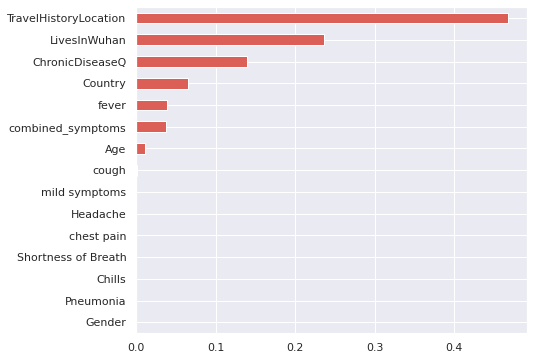

In [326]:
feature_importances = pd.Series(dt_tuned.feature_importances_, index=X3.columns)
print(feature_importances)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind='barh', figsize=(7,6))

# KNN

In [0]:
leaf_size = list(range(1,10))
n_neighbors = list(range(1,10))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=3)
#Fit the model
best_model = clf.fit(X_train_res3, y_train_res3)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])


In [332]:
best_model.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                     weights='uniform')

In [0]:
knn_tuned = best_model.best_estimator_

In [334]:
knn_tuned.fit(X_train_res3,y_train_res3)
knn_pred = knn_tuned.predict(X_test_res3)
print(classification_report(y_test_res3, knn_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91       208
           1       0.94      0.86      0.90       208

    accuracy                           0.90       416
   macro avg       0.90      0.90      0.90       416
weighted avg       0.90      0.90      0.90       416



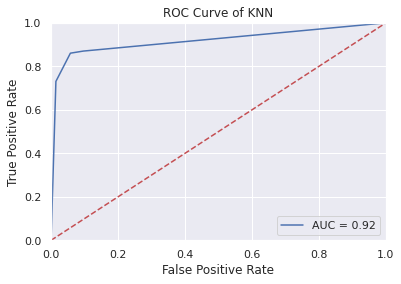

In [336]:

from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

y_scores = knn_tuned.predict_proba(X_test_res3)
fpr, tpr, threshold = roc_curve(y_test_res3, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of KNN')
plt.show()